In [20]:
import torch
import torch.utils.data as data
from python.data.dataset import *
from python.models.generator import UNet
from python.utils.images import *
from python.train.trainer import *
from python.eval.evaluation import Evalutation
from torchvision.models.resnet import resnet18
from fastai.vision.models.unet import DynamicUnet
from fastai.vision.learner import create_body

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


If pretrain

In [90]:
resnet_body = create_body(resnet18, pretrained=True, n_in=2, cut=-2)
generator_pretrain = DynamicUnet(resnet_body, 2, (256, 256), y_range=(-1, 1)).to(device)
generator_pretrain.load_state_dict(torch.load("saves/cGan_100_R1_0001_pretrain_v/saved_models/generator_best_15", map_location=device))

<All keys matched successfully>

Load model

In [65]:
generator = UNet(1, 2, stochastic=True).train() # see report for the 'train'
generator.load_state_dict(torch.load("saves/cGan_100_R1_0001_v/saved_models/generator_best_15", map_location=device))

<All keys matched successfully>

In [27]:
dataset = "data/Coco"
version = "2017"

batch_size = 10
ds = CocoLab(dataset, splits=["test"], version=version, size=256, train=False)
loader = data.DataLoader(ds, batch_size=batch_size, shuffle=True, num_workers=2)

# Evaluation

#### Qualitative

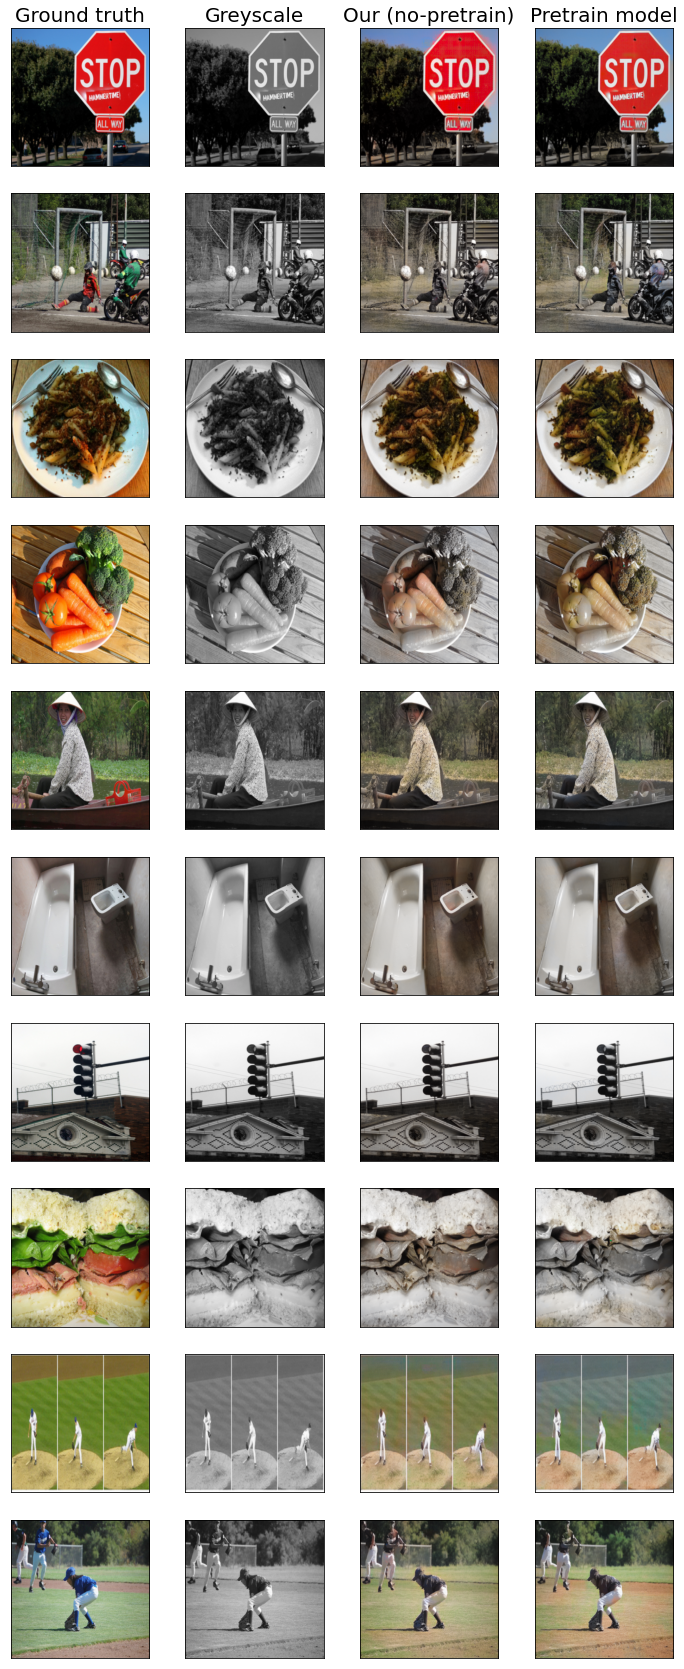

In [97]:
multi_plot_generators(loader, [generator], ["Our (no-pretrain)", "Pretrain model"], pretrain=generator_pretrain)

### Quantitative

In [ ]:
evalutation = Evalutation()
evaluation = torch.zeros((len(loader), 2))
for i, (L, ab) in enumerate(loader):
    fake_ab = generator(L)
    evaluation[i] = evalutation.eval(L, ab, fake_ab)
    print("\r", i, "/", len(loader), " | ", evaluation[i], end="\r")

print(evaluation.mean(axis=0))